1. Importing Required Libraries

In [181]:
import numpy as np 
print("Importing Numpy")
print("Importing Pandas")
import pandas as pd 
print("Importing Matplotlib")
from matplotlib import pyplot as plt
print("Importing Seaborn")
import seaborn as sns
print("Importing Statsmodels")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Importing Numpy
Importing Pandas
Importing Matplotlib
Importing Seaborn
Importing Statsmodels


2. Importing the dataset

In [182]:
df = pd.read_csv('../dataset/Dataset_1.csv',sep=';')
df.head()

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


3. Preparation of Date Time Column

In [183]:
df['Date'] =  pd.to_datetime(df['Date'],format="%d.%m.%Y %H:%M")

df.set_index(df['Date'],inplace=True)

df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
Date,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


4. Calculating the total oder amount

In [184]:
df['Price'] = df['Price'].str.replace(',', '.')
df['Total'] = df['Quantity'].astype(float) * df['Price'].astype(float)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total
Date,,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


5. Calculating the total sales per day

In [185]:
daily_sales = df.groupby(df.index.date)['Total'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales.head()

,Date,Sales
0,2010-12-01,58405.41
1,2010-12-02,47725.88
2,2010-12-03,44366.86
3,2010-12-05,31774.95
4,2010-12-06,53647.96


6. Plotting the total sales per day

<AxesSubplot:ylabel='Sales'>

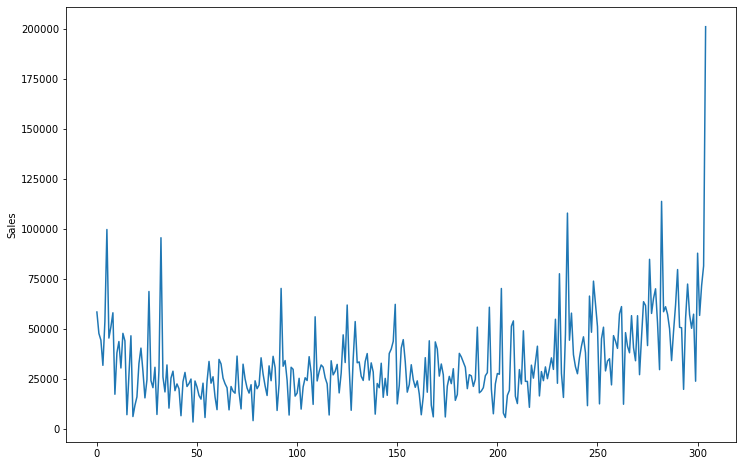

In [186]:

plt.figure(figsize=(12,8))
sns.lineplot(data=daily_sales, x=daily_sales.index, y=daily_sales.Sales)

7. Function to check stationarity

In [187]:
def check_stationarity(df , param):
    stationarity=False
    adfTest = adfuller(daily_sales[param], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(stats)
    for key,values in adfTest[4].items():
        print("Criticallity ",key," : ",values)
        if(float(values)>float(adfTest[0])):
            stationarity=True
            break
    if(stationarity==False and adfTest[1]<=0.05):
        stationarity=True
    df['rollMean'] = df[param].rolling(window=7).mean()
    df['rollStd']= df[param].rolling(window=7).std()
    plt.figure(figsize=(15,10))
    sns.lineplot(data=df, x=df.index, y=df[param])
    sns.lineplot(data=df,x=df.index, y=df.rollMean)
    sns.lineplot(data=df,x=df.index, y=df.rollStd)
    print("Stationarity: ",stationarity)
    return stationarity

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

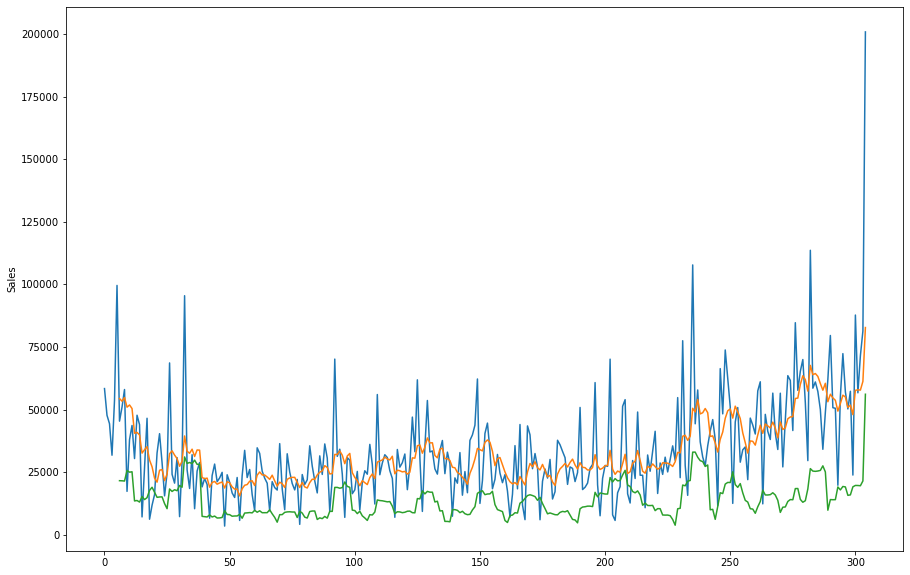

In [188]:
check_stationarity(daily_sales,'Sales')

8. Making the time series stationary using shift

Test Statistic                -6.295691e+00
p-value                        3.510548e-08
Lags Used                      1.000000e+01
Number of Observations Used    2.940000e+02
dtype: float64
Criticallity  1%  :  -3.452789844280995
Stationarity:  True


True

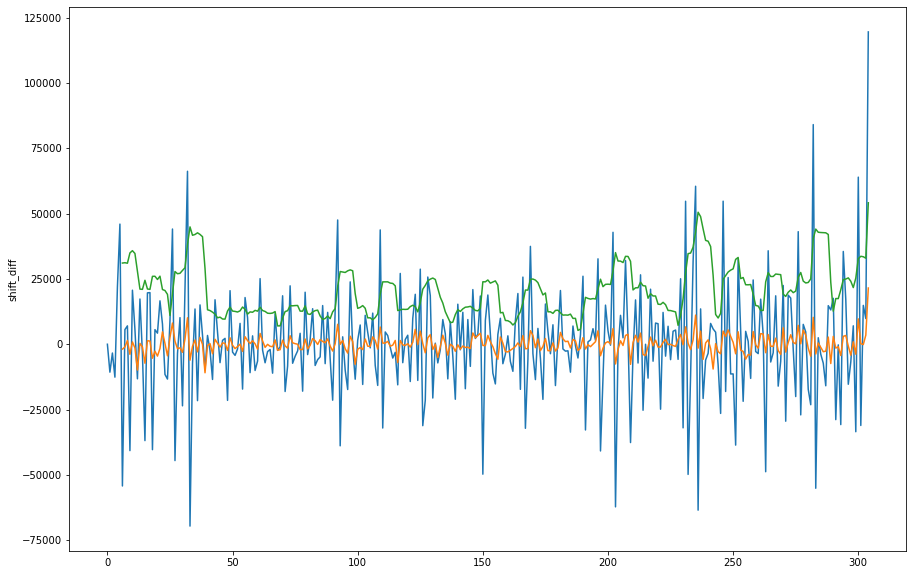

In [189]:
daily_sales['shift']=daily_sales['Sales'].shift()
daily_sales['shift_diff'] = daily_sales['Sales'] - daily_sales['shift'] 
daily_sales['shift_diff'].fillna(0,inplace=True)
check_stationarity(daily_sales,'shift_diff')

9. Making the time series stationary using log

Test Statistic                  -1.094343
p-value                          0.717322
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

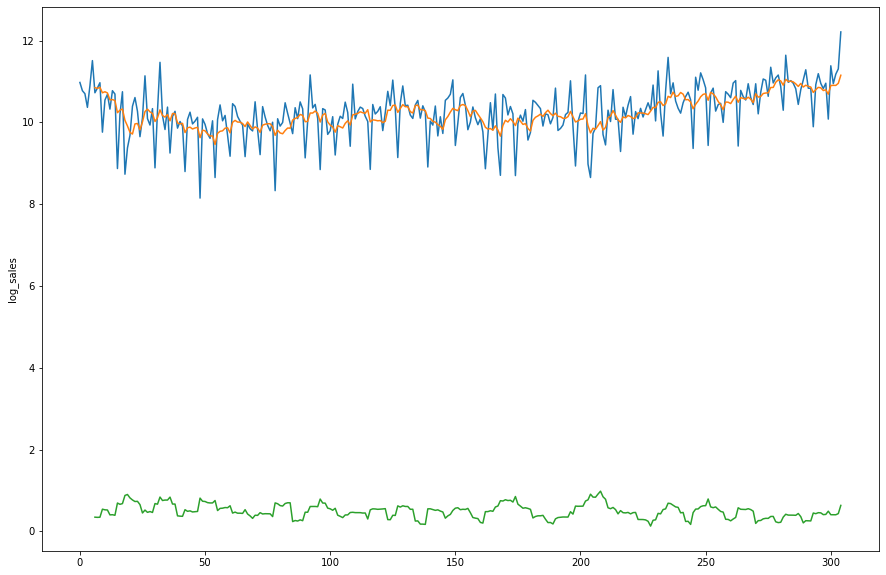

In [190]:
daily_sales['log_sales']=daily_sales['Sales'].apply(lambda x: np.log(x))
check_stationarity(daily_sales,'log_sales')

10. Making the time series stationary using square root

Test Statistic                  -0.496842
p-value                          0.892631
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

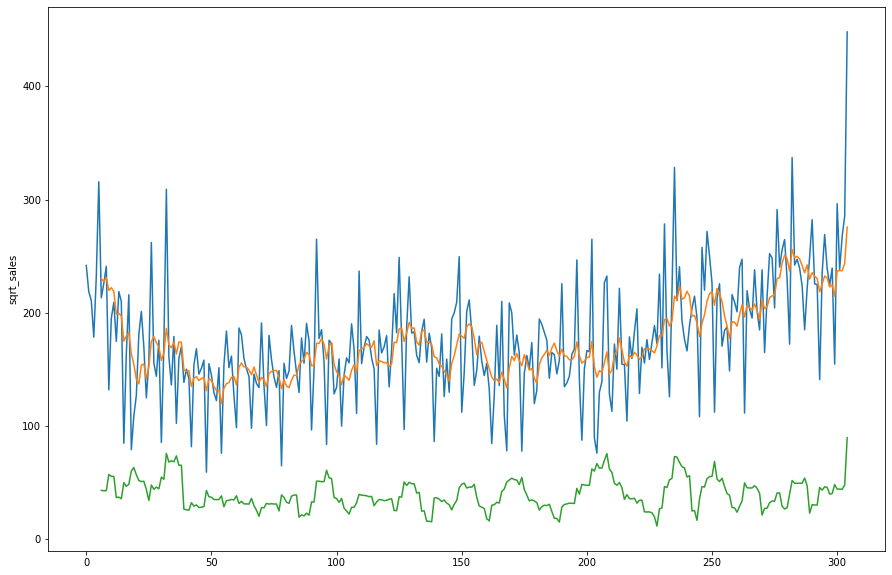

In [191]:
daily_sales['sqrt_sales'] = np.sqrt(daily_sales['Sales'])
check_stationarity(daily_sales,'sqrt_sales')

11. Making the time series stationary using cube root

Test Statistic                  -0.695790
p-value                          0.847837
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

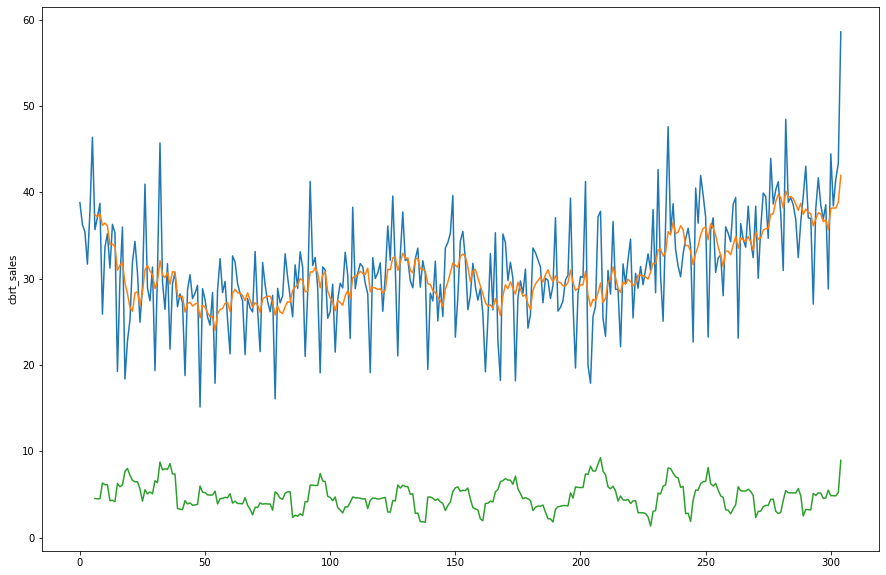

In [192]:
daily_sales['cbrt_sales'] = np.cbrt(daily_sales['Sales'])
check_stationarity(daily_sales,'cbrt_sales')

12. Making the time series stationary using log and square root

Test Statistic                  -1.152969
p-value                          0.693493
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

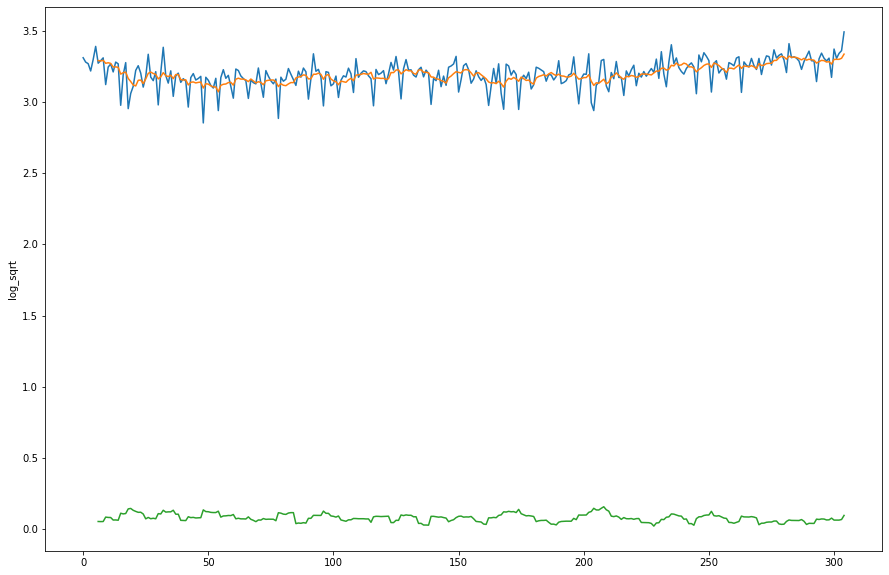

In [193]:
daily_sales['log_sqrt']=daily_sales['log_sales'].apply(lambda x: np.sqrt(x))
check_stationarity(daily_sales,'log_sqrt')

13. Making the time series stationary using log, sqare root and shift

Test Statistic                -8.912007e+00
p-value                        1.097874e-14
Lags Used                      1.000000e+01
Number of Observations Used    2.940000e+02
dtype: float64
Criticallity  1%  :  -3.452789844280995
Stationarity:  True


True

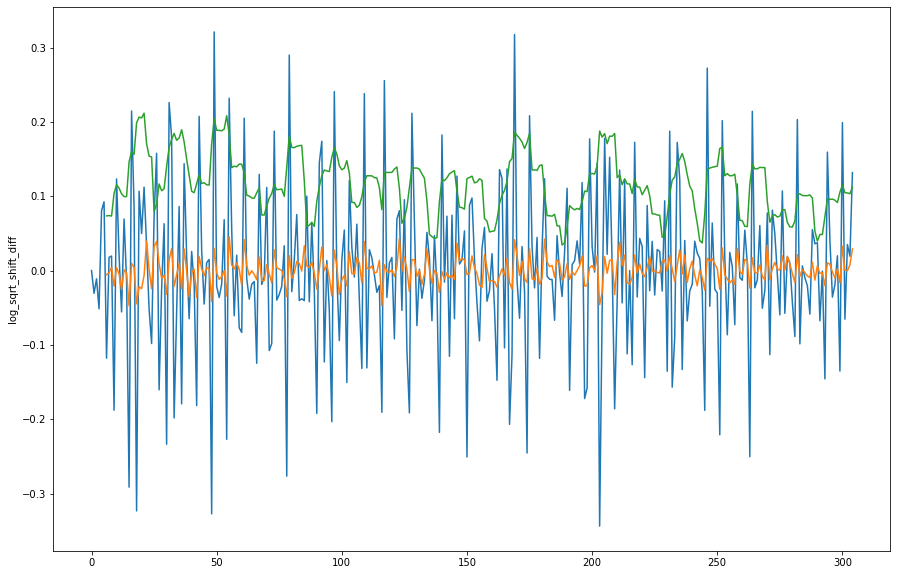

In [194]:
daily_sales['log_sqrt_shift_diff'] = daily_sales['log_sqrt'] - daily_sales['log_sqrt'].shift()
daily_sales['log_sqrt_shift_diff'].dropna(inplace=True)

daily_sales['log_sqrt_shift_diff'].fillna(0,inplace=True)
check_stationarity(daily_sales, 'log_sqrt_shift_diff')



 According to the statistics, the log sqrt shift method is the best method to make the time series stationary.Going for the time series prediction using ARIMA model.

14. Finding the p,d,q values for ARIMA model

Lags :  20
Considering P :  1


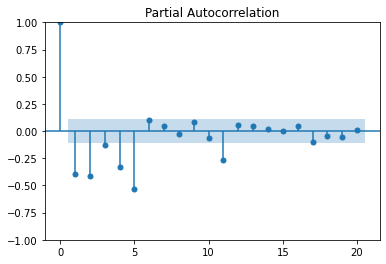

In [195]:
plot_pacf(daily_sales['log_sqrt_shift_diff'], lags=20)
print("Lags : ",20)
print("Considering P : ",1)

Lags :  20
Considering Q :  1


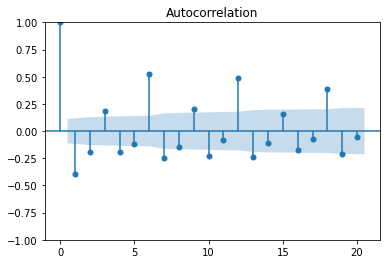

In [196]:
plot_acf(daily_sales['log_sqrt_shift_diff'], lags=20)
print("Lags : ",20)
print("Considering Q : ",1)

In [197]:
print("P : ",1)
print("D : ",1)
print("Q : ",1)


P :  1
D :  1
Q :  1


15. Splitting the data into train and test

In [198]:
train = daily_sales[:int(0.7*(len(daily_sales)))]
test = daily_sales[int(0.7*(len(daily_sales))):]

16. Training the ARIMA model

In [199]:
ARIMA(train['log_sqrt_shift_diff'], order=(1, 1, 1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     log_sqrt_shift_diff   No. Observations:                  213
Model:                  ARIMA(1, 1, 1)   Log Likelihood                 160.733
Date:                 Sat, 23 Mar 2024   AIC                           -315.467
Time:                         07:25:20   BIC                           -305.397
Sample:                              0   HQIC                          -311.397
                                 - 213                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3645      0.058     -6.251      0.000      -0.479      -0.250
ma.L1         -1.0000     36.374     -0.027      0.978     -72.291      70.291
sigma2         0.0125      0.454      0.027      0.978      -0.878       0.903
===================================================================================
Ljung-Box (L1) (Q):                   6.17   Jarque-Bera (JB):                 6.17
Prob(Q):                              0.01   Prob(JB):                         0.05
Heteroskedasticity (H):               0.88   Skew:                            -0.41
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

17. Predicting the results

In [200]:
prediction = ARIMA(train['log_sqrt_shift_diff'], order=(1, 1, 1)).fit().predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
daily_sales['arima_prediction'] = prediction
daily_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Date,Sales,rollMean,rollStd,shift,shift_diff,log_sales,sqrt_sales,cbrt_sales,log_sqrt,log_sqrt_shift_diff,arima_prediction
205,2011-08-15,16776.55,0.018586,0.184209,5718.57,11057.98,9.727737,129.524322,25.599661,3.118932,0.177593,NaN
206,2011-08-16,19239.66,-0.003594,0.170795,16776.55,2463.11,9.864729,138.707101,26.795743,3.140817,0.021885,NaN
207,2011-08-17,51301.92,0.013579,0.180750,19239.66,32062.26,10.845483,226.499272,37.157333,3.293248,0.152432,NaN
208,2011-08-18,53975.08,0.014967,0.180647,51301.92,2673.16,10.896278,232.325375,37.791816,3.300951,0.007703,NaN
209,2011-08-19,16360.10,-0.032219,0.184350,53975.08,-37614.98,9.702601,127.906607,25.386061,3.114900,-0.186051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,87787.26,0.032656,0.115109,23847.89,63939.37,11.382672,296.289149,44.443730,3.373822,0.199006,-0.000639
301,2011-12-06,56713.21,0.000550,0.104757,87787.26,-31074.05,10.945762,238.145355,38.420358,3.308438,-0.065383,-0.000639
302,2011-12-07,71582.27,-0.000233,0.104429,56713.21,14869.06,11.178603,267.548631,41.521065,3.343442,0.035004,-0.000639
303,2011-12-08,81410.86,0.007611,0.103376,71582.27,9828.59,11.307264,285.325884,43.340520,3.362628,0.019186,-0.000639


18. Plotting the results

<AxesSubplot:ylabel='log_sqrt_shift_diff'>

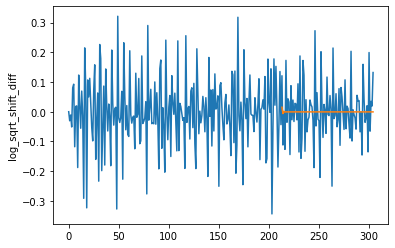

In [216]:
daily_sales['arima_prediction'].dropna()
sns.lineplot(data=daily_sales,x=daily_sales.index, y=daily_sales['log_sqrt_shift_diff'])
sns.lineplot(data=daily_sales,x=daily_sales.index, y=daily_sales['arima_prediction'])


19. Finding the Mean Squared Error

In [202]:
from sklearn.metrics import mean_squared_error
mean_squared_error(daily_sales['log_sqrt_shift_diff'][:len(prediction)], prediction)

0.016292865026339805

20. Implementing SARIMAX model

In [203]:

SARIMAX(train['log_sqrt_shift_diff'], order=(1, 1, 1), seasonal_order=(1,1,1,30)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                log_sqrt_shift_diff   No. Observations:                  213
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                 143.096
Date:                            Sat, 23 Mar 2024   AIC                           -276.192
Time:                                    07:25:34   BIC                           -260.172
Sample:                                         0   HQIC                          -269.698
                                            - 213                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4201      0.067     -6.264      0.000      -0.551      -0.289
ma.L1         -0.9967      0.549     -1.815      0.070      -2.073       0.080
ar.S.L30       0.0565      0.129      0.438      0.661      -0.196       0.309
ma.S.L30      -0.9917      5.364     -0.185      0.853     -11.505       9.522
sigma2         0.0087      0.046      0.188      0.851      -0.082       0.099
===================================================================================
Ljung-Box (L1) (Q):                   4.67   Jarque-Bera (JB):                10.42
Prob(Q):                              0.03   Prob(JB):                         0.01
Heteroskedasticity (H):               1.21   Skew:                            -0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

21. Predicting the results

In [204]:
predictions = SARIMAX(train['log_sqrt_shift_diff'], order=(1, 1, 1), seasonal_order=(1,1,1,30)).fit().predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
daily_sales['sarimax_prediction'] = predictions
daily_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Date,Sales,rollMean,rollStd,shift,shift_diff,log_sales,sqrt_sales,cbrt_sales,log_sqrt,log_sqrt_shift_diff,arima_prediction,sarimax_prediction
205,2011-08-15,16776.55,0.018586,0.184209,5718.57,11057.98,9.727737,129.524322,25.599661,3.118932,0.177593,NaN,NaN
206,2011-08-16,19239.66,-0.003594,0.170795,16776.55,2463.11,9.864729,138.707101,26.795743,3.140817,0.021885,NaN,NaN
207,2011-08-17,51301.92,0.013579,0.180750,19239.66,32062.26,10.845483,226.499272,37.157333,3.293248,0.152432,NaN,NaN
208,2011-08-18,53975.08,0.014967,0.180647,51301.92,2673.16,10.896278,232.325375,37.791816,3.300951,0.007703,NaN,NaN
209,2011-08-19,16360.10,-0.032219,0.184350,53975.08,-37614.98,9.702601,127.906607,25.386061,3.114900,-0.186051,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,87787.26,0.032656,0.115109,23847.89,63939.37,11.382672,296.289149,44.443730,3.373822,0.199006,-0.000639,-0.090738
301,2011-12-06,56713.21,0.000550,0.104757,87787.26,-31074.05,10.945762,238.145355,38.420358,3.308438,-0.065383,-0.000639,0.101632
302,2011-12-07,71582.27,-0.000233,0.104429,56713.21,14869.06,11.178603,267.548631,41.521065,3.343442,0.035004,-0.000639,0.056986
303,2011-12-08,81410.86,0.007611,0.103376,71582.27,9828.59,11.307264,285.325884,43.340520,3.362628,0.019186,-0.000639,-0.037962


22. Plotting the results

<AxesSubplot:ylabel='log_sqrt_shift_diff'>

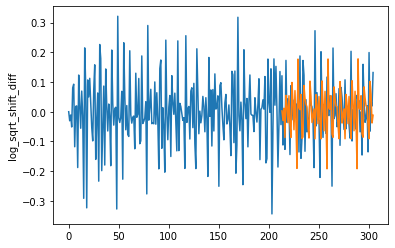

In [205]:
daily_sales['sarimax_prediction'].dropna()
sns.lineplot(data=daily_sales,x=daily_sales.index, y=daily_sales['log_sqrt_shift_diff'])
sns.lineplot(data=daily_sales,x=daily_sales.index, y=daily_sales['sarimax_prediction'])

23. Finding the mean squared error

In [206]:
mean_squared_error(daily_sales['log_sqrt_shift_diff'][:len(prediction)], prediction)

0.016292865026339805